# CMPE 257 Homework 2

## Question 1

### a. Load dataset from csv file.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

whole_data_set = pd.read_csv("datasetHW2.csv", header=None, skipinitialspace=True)
print(whole_data_set)
len(whole_data_set)

               0         1                   2            3               4  \
0      longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
1        -122.23     37.88                41.0        880.0           129.0   
2        -122.22     37.86                21.0       7099.0          1106.0   
3        -122.24     37.85                52.0       1467.0           190.0   
4        -122.25     37.85                52.0       1274.0           235.0   
5        -122.25     37.85                52.0       1627.0           280.0   
6        -122.25     37.85                52.0        919.0           213.0   
7        -122.25     37.84                52.0       2535.0           489.0   
8        -122.25     37.84                52.0       3104.0           687.0   
9        -122.26     37.84                42.0       2555.0           665.0   
10       -122.25     37.84                52.0       3549.0           707.0   
11       -122.26     37.85                52.0      

20641

### b. Remove the header which is 0th row.

In [3]:
data_set = whole_data_set.iloc[1:,:]
print(len(data_set))

20640


### c. Split the dataset into 70:30 training set and test set (non-repetitive random selection).

In [4]:
data = data_set.drop_duplicates(keep='first')  # we are removing duplicates from the dataset which can affect the accuracy of the model
print(len(data)) # in this case there are no duplicates

import sklearn.utils 
import sklearn.model_selection

training_data, test_data = sklearn.model_selection.train_test_split(data, shuffle='True', test_size=0.3)
print(len(training_data), len(test_data))

20640
14448 6192


### d. Plot each feature against the target in the training set.

In [5]:
vals = whole_data_set.iloc[:,9].drop_duplicates(keep='first') # to find unique values of ocean_proximity
print(vals)

data.iloc[:,9] = data.iloc[:,9].map({'NEAR BAY':0, '<1H OCEAN':1, 'NEAR OCEAN':2,  'INLAND':3, 'ISLAND':4})
print(data)


0       ocean_proximity
1              NEAR BAY
702           <1H OCEAN
955              INLAND
1851         NEAR OCEAN
8315             ISLAND
Name: 9, dtype: object
             0      1     2        3       4       5       6       7  \
1      -122.23  37.88  41.0    880.0   129.0   322.0   126.0  8.3252   
2      -122.22  37.86  21.0   7099.0  1106.0  2401.0  1138.0  8.3014   
3      -122.24  37.85  52.0   1467.0   190.0   496.0   177.0  7.2574   
4      -122.25  37.85  52.0   1274.0   235.0   558.0   219.0  5.6431   
5      -122.25  37.85  52.0   1627.0   280.0   565.0   259.0  3.8462   
6      -122.25  37.85  52.0    919.0   213.0   413.0   193.0  4.0368   
7      -122.25  37.84  52.0   2535.0   489.0  1094.0   514.0  3.6591   
8      -122.25  37.84  52.0   3104.0   687.0  1157.0   647.0    3.12   
9      -122.26  37.84  42.0   2555.0   665.0  1206.0   595.0  2.0804   
10     -122.25  37.84  52.0   3549.0   707.0  1551.0   714.0  3.6912   
11     -122.26  37.85  52.0   2202.0   43

          0         1         2         3         4         5         6  \
0  1.000000 -0.924664 -0.108197  0.044568  0.069608  0.099773  0.055310   
1 -0.924664  1.000000  0.011173 -0.036100 -0.066983 -0.108785 -0.071035   
2 -0.108197  0.011173  1.000000 -0.361262 -0.320451 -0.296244 -0.302916   
3  0.044568 -0.036100 -0.361262  1.000000  0.930380  0.857126  0.918484   
4  0.069608 -0.066983 -0.320451  0.930380  1.000000  0.877747  0.979728   
5  0.099773 -0.108785 -0.296244  0.857126  0.877747  1.000000  0.907222   
6  0.055310 -0.071035 -0.302916  0.918484  0.979728  0.907222  1.000000   
7 -0.015176 -0.079809 -0.119034  0.198050 -0.007723  0.004834  0.013033   
8 -0.045967 -0.144160  0.105623  0.134153  0.049686 -0.024650  0.065843   
9  0.108475  0.153237 -0.280764  0.026557  0.000239 -0.008443 -0.032032   

          7         8         9  
0 -0.015176 -0.045967  0.108475  
1 -0.079809 -0.144160  0.153237  
2 -0.119034  0.105623 -0.280764  
3  0.198050  0.134153  0.026557  
4 -0

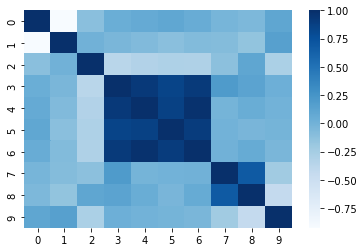

In [6]:
data[0:] = data[0:].astype(float) # as the numeric values were stored as string object we converted them to float for computation of correlation
data_hm = data.corr()
print(data_hm)
sns.heatmap(data_hm,cmap='Blues')

### e. Write down your observations on the above plots to find which features had maximum influence on the target.

In [7]:
# from heatmap we notice that median_income and ocean_proximity are most influencing the value of house 
# the degree of correlation for median_income is 0.688075 and for ocean_proximity its - 0.435062

### f. What kind of a problem is this? (eg. classification, regression, clustering, etc).

In [8]:
# Its a regression problem as we have are using one(univariate) or more(multivariate) features to predict the value of the target

### g. Get the quick description of data using info() and description() functions.

In [9]:
print(data.info(null_counts='False'))
# we notice that 20433 values are numeric values for total_bedrooms 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 1 to 20640
Data columns (total 10 columns):
0    20640 non-null float64
1    20640 non-null float64
2    20640 non-null int64
3    20640 non-null int64
4    20433 non-null float64
5    20640 non-null int64
6    20640 non-null int64
7    20640 non-null float64
8    20640 non-null int64
9    20640 non-null float64
dtypes: float64(5), int64(5)
memory usage: 1.7 MB
None


In [10]:
print(data.describe())

                  0             1             2             3             4  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20433.000000   
mean    -119.569704     35.631861     28.639486   2635.763081    537.870553   
std        2.003532      2.135952     12.585558   2181.615252    421.385070   
min     -124.350000     32.540000      1.000000      2.000000      1.000000   
25%     -121.800000     33.930000     18.000000   1447.750000    296.000000   
50%     -118.490000     34.260000     29.000000   2127.000000    435.000000   
75%     -118.010000     37.710000     37.000000   3148.000000    647.000000   
max     -114.310000     41.950000     52.000000  39320.000000   6445.000000   

                  5             6             7              8             9  
count  20640.000000  20640.000000  20640.000000   20640.000000  20640.000000  
mean    1425.476744    499.539680      3.870671  206855.816909      1.653343  
std     1132.462122    382.329753      1.899822  11

### h. Perform min-max normalization on features and target.

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm_values = scaler.fit_transform(data[[7,8,9]])


### i. Describe rules of NumPy Broadcasting.

In [12]:
# broadcasting describes how numpy treats arrays with different shapes during arithmetic operations
# while operating on arrays numpy checks the dimensions of the two arrays starting from rightmost dimension. two dimensions are compatible iff they are equal OR one of them is 1

# eg 1 : when multiplying a scalar value with an array -> here the scalar value is broadcasted to be of same dimensions as array a 
a = np.array([1,4,8])
b = 3
print(a*b)

# eg 2 : when dimension are compatible
p = np.ones(5)
q = np.ones((4,5))
# p.shape is (5,) and q.shape is (4,5) so trailing dimension i.e 5 is equal and rest dimension are stretched to match the longer one 
print(p*q)

#eg 3 : when dimension are not compatible
p = np.ones((4,6))
q = np.ones((3,5,4))
# p.shape is (4,6) and q.shape is (3,5,4) so trailing dimension i.e 6 and 4 are not equal hence they are not compatible for broadcasting
print(p+q)


[ 3 12 24]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


ValueError: operands could not be broadcast together with shapes (4,6) (3,5,4) 

### j. Describe the purpose of numpy.reshape with a valid example


In [13]:
# we have a 1D array and a 2D array and we need to perform matrix multiplication 
oneD = np.array([1,2,3,4,5,6,7,8,9])
twoD = np.array([[2,3,4],[5,7,8],[3,5,7]])
# 2D array has dimension 
# twoD.shape is (3,3) and oneD.shape is (9,) hance numpy broad cast rule doesnt apply so we need to reshape the oneD array

oneD = oneD.reshape(3,3)
print("oneD * twoD = ",oneD*twoD)
print("\n oneD twoD = ", np.dot(oneD,twoD))

oneD * twoD =  [[ 2  6 12]
 [20 35 48]
 [21 40 63]]

 oneD twoD =  [[ 21  32  41]
 [ 51  77  98]
 [ 81 122 155]]


## Question 2
Boston housing dataset is a famous dataset widely used for machine learning. In this problem, you will train
a linear regression model that predicts the house price using the Boston housing dataset.

### a. Load Boston house prices dataset. Plot each feature against the target in the training set.  Write down your observations on the above plots to find which features had maximum influence on the target.
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html


In [14]:
from sklearn import datasets
bdata = datasets.load_boston()
boston_data = pd.DataFrame(data=bdata['data'], columns=bdata['feature_names'])
print(boston_data)

'''CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's'''

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   

"CRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

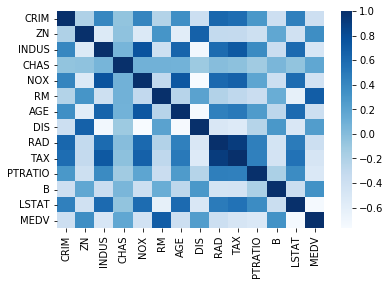

In [15]:
boston_data['MEDV'] = bdata['target'] #adding MEDV values to the dataset
data_hm = boston_data.corr()
print(data_hm)
sns.heatmap(data_hm,cmap='Blues')

In [16]:
# from the correlation matrix we notice that RM and LSTAT have most influence on the MEDV as their degree of correlation is 0.69 and -0.73 respectively.
# negative degree of correlation emphasize that the value of one variable increases with decrease in other.

### b. Store all the features and targets into X and Y respectively. How many instances and how many features does the dataset have? Split the data into 70% training set and 30% test set.

In [17]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','PTRATIO','B','RM','LSTAT']
X = boston_data[cols] # ALL the features 
Y = boston_data['MEDV'] # target 
# print(X,Y)

print("Instances in dataset : ",len(boston_data))
print("Features in dataset : ",len(bdata['feature_names']))
# totally the dataset has 13 features but using the heatmap plot we notice that LSTAT has most influence on target (MEDV) hence we use that for regression model 
# removing redundant features from dataset 
for col in ['CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','PTRATIO','B','RM']:
    del boston_data[col]

training_bdata, test_bdata = sklearn.model_selection.train_test_split(boston_data, shuffle='True', test_size=0.3, train_size=0.7)
print(len(training_bdata), len(test_bdata))
#print(training_bdata)
#print(test_bdata)

Instances in dataset :  506
Features in dataset :  13
354 152


### c. Train a linear regression model using  selected feature.

(354, 1)
(354,)


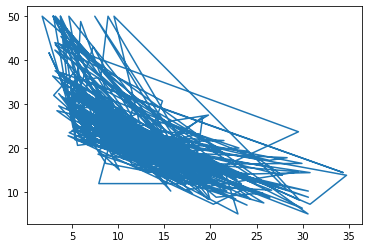

In [18]:
# as mentioned we are using only one feature LSTAT to train the model instead of RM and LSTAT

from sklearn.linear_model import LinearRegression

x = training_bdata['LSTAT'].values.reshape(-1,1)
y = training_bdata['MEDV']
print(x.shape)
print(y.shape)
model = LinearRegression()
model.fit(x,y) # using training data to train the model i.e. fitting
plt.plot(x,y)

### d. Test the model using the test set. Report sklearn.metrics.mean squared error and sklearn.metrics.r2 score between the predicting result and target.

In [ ]:
medv_predicted = model.predict(test_bdata['LSTAT'].values.reshape(-1,1))
medv_test = test_bdata['MEDV']

print("Mean squared error : ",sklearn.metrics.mean_squared_error(medv_predicted,medv_test))
print("r2 score : ",sklearn.metrics.r2_score(medv_predicted,test_bdata['MEDV']))